# Confusion matrix

In [1]:
import os
import tensorflow as tf
from evaluate.ImageClassificationReporter import ImageClassificationReporter as Reporter

## Initializing

In [2]:
# Avoid out of memory errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Configuration

In [3]:
CFG = {
    "dataset_high_quality": "D:\Github Public\DATASET MANAGER\Blue Archive",
    "dataset_medium_quality": "D:\Github Public\DATASET MANAGER\Blue Archive Low Bookmark",
    "model1": {"h5":".\export model\Res2Net50SE_224x224_2Class (ILLUST VS MANGA).h5",
               "name":"Res2Net50SE"},
    "model2": {"h5":".\export model\Res2Net50SE_224x224_2Class_fine-tune_playground.h5",
                "name":"Res2Net50SE fine-tune"},
    "model3": {"h5":".\export model\CCT_I224x224_Conv64_128_256_L7_H4_D256_MLP512_2Class.h5",
                "name":"Compact Convolutional Transformer"},
}

## Declare functions

In [4]:
def square_image_processing(image_path, image_size):
    # Read the image file from the given path
    image = tf.io.read_file(image_path)
    
    # Decode the image into a tensor, disabling animation expansion
    image = tf.image.decode_image(image, expand_animations=False)
    
    # Resize the image to the specified dimensions while preserving aspect ratio and using antialiasing
    image = tf.image.resize(image, (image_size, image_size),
                            preserve_aspect_ratio=True,
                            antialias=True)
    
    # Resize the image with padding to ensure it has the exact dimensions specified
    image = tf.image.resize_with_pad(image, image_size, image_size)
    
    # Normalize the image pixel values to the range [0, 1] by dividing by 255.0
    image = image / 255.0
    
    return image

In [5]:
def get_path(target_dir):
    path_list = [os.path.join(root,image) for root, _, files in os.walk(target_dir, topdown=True) for image in files]
    path_list = [(path, path.split('\\')[-2]) for path in path_list]
    return path_list

## Overall

In [6]:
BA_path = get_path(CFG["dataset_high_quality"])
BA_path.extend(get_path(CFG["dataset_medium_quality"]))
BA_path = [path for path in BA_path if "TESTING" not in path]

label_list = [label for _, label in BA_path]
label_list = sorted(list(set(label_list)))

Loading model ...
Model loaded successfully. No custom Keras layers detected.
Processing class prediction ...
682/682 [====================] - 256s 364ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       0.97      0.98      0.98      9071
       MANGA       0.91      0.85      0.88      1840

    accuracy                           0.96     10911
   macro avg       0.94      0.92      0.93     10911
weighted avg       0.96      0.96      0.96     10911



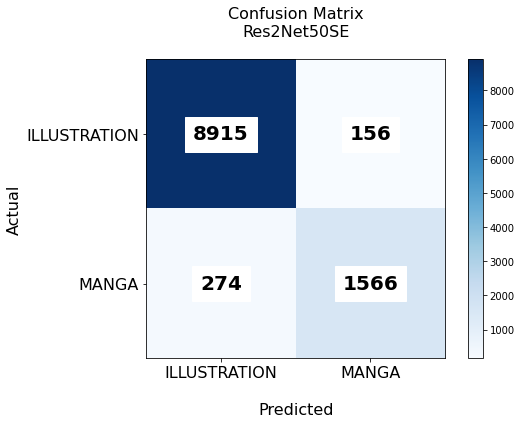

In [7]:
model_report = Reporter(
    h5_file=CFG["model1"]["h5"],
    model_name=CFG["model1"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()

Loading model ...
Model loaded successfully. No custom Keras layers detected.
Processing class prediction ...
682/682 [====================] - 241s 350ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       0.99      0.96      0.98      9071
       MANGA       0.84      0.94      0.89      1840

    accuracy                           0.96     10911
   macro avg       0.91      0.95      0.93     10911
weighted avg       0.96      0.96      0.96     10911



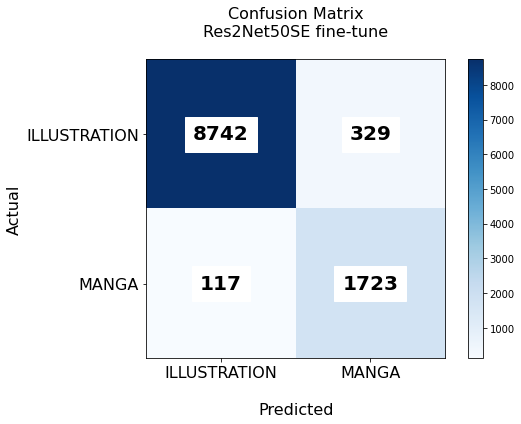

In [8]:
model_report = Reporter(
    h5_file=CFG["model2"]["h5"],
    model_name=CFG["model2"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()

Loading model ...
Error: Custom Keras layers detected.
Loading model with custom objects ...Complete
Processing class prediction ...
682/682 [====================] - 164s 238ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       0.98      0.92      0.95      9071
       MANGA       0.71      0.93      0.81      1840

    accuracy                           0.92     10911
   macro avg       0.85      0.93      0.88     10911
weighted avg       0.94      0.92      0.93     10911



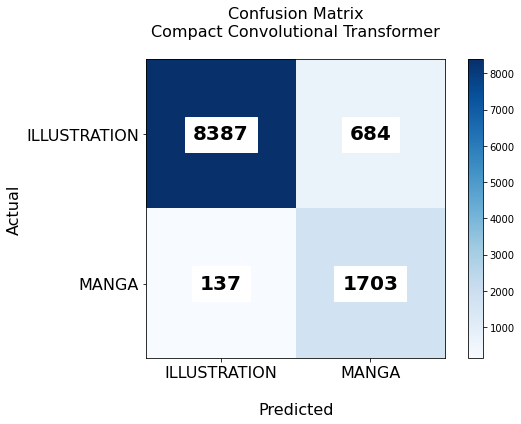

In [9]:
model_report = Reporter(
    h5_file=CFG["model3"]["h5"],
    model_name=CFG["model3"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()

## High quality images

In [10]:
BA_path = get_path(CFG["dataset_high_quality"])
BA_path = [path for path in BA_path if "TESTING" not in path]

label_list = [label for _, label in BA_path]
label_list = sorted(list(set(label_list)))

Loading model ...
Model loaded successfully. No custom Keras layers detected.
Processing class prediction ...
289/289 [====================] - 105s 354ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       1.00      0.98      0.99      3992
       MANGA       0.91      1.00      0.95       622

    accuracy                           0.99      4614
   macro avg       0.95      0.99      0.97      4614
weighted avg       0.99      0.99      0.99      4614



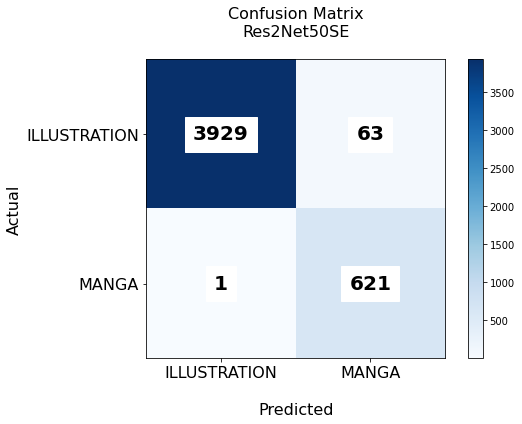

In [11]:
model_report = Reporter(
    h5_file=CFG["model1"]["h5"],
    model_name=CFG["model1"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()

Loading model ...
Model loaded successfully. No custom Keras layers detected.
Processing class prediction ...
289/289 [====================] - 103s 347ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       1.00      0.97      0.99      3992
       MANGA       0.85      1.00      0.92       622

    accuracy                           0.98      4614
   macro avg       0.93      0.99      0.95      4614
weighted avg       0.98      0.98      0.98      4614



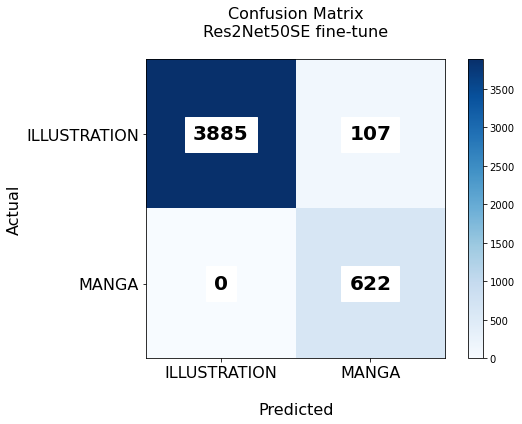

In [12]:
model_report = Reporter(
    h5_file=CFG["model2"]["h5"],
    model_name=CFG["model2"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()

Loading model ...
Error: Custom Keras layers detected.
Loading model with custom objects ...Complete
Processing class prediction ...
289/289 [====================] - 69s 235ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       1.00      0.94      0.97      3992
       MANGA       0.72      0.98      0.83       622

    accuracy                           0.95      4614
   macro avg       0.86      0.96      0.90      4614
weighted avg       0.96      0.95      0.95      4614



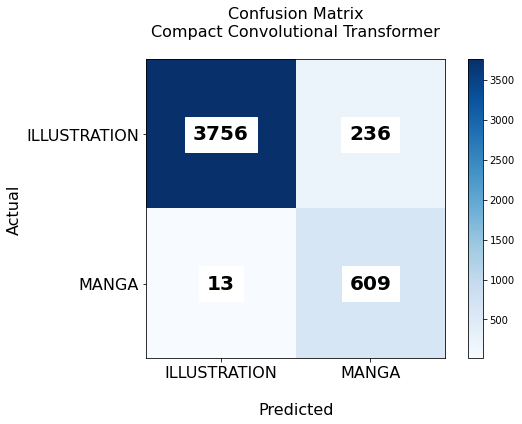

In [13]:
model_report = Reporter(
    h5_file=CFG["model3"]["h5"],
    model_name=CFG["model3"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()

## Medium quality images

In [14]:
BA_path = get_path(CFG["dataset_medium_quality"])
BA_path = [path for path in BA_path if "TESTING" not in path]

label_list = [label for _, label in BA_path]
label_list = sorted(list(set(label_list)))

Loading model ...
Model loaded successfully. No custom Keras layers detected.
Processing class prediction ...
394/394 [====================] - 140s 348ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       0.95      0.98      0.96      5079
       MANGA       0.91      0.78      0.84      1218

    accuracy                           0.94      6297
   macro avg       0.93      0.88      0.90      6297
weighted avg       0.94      0.94      0.94      6297



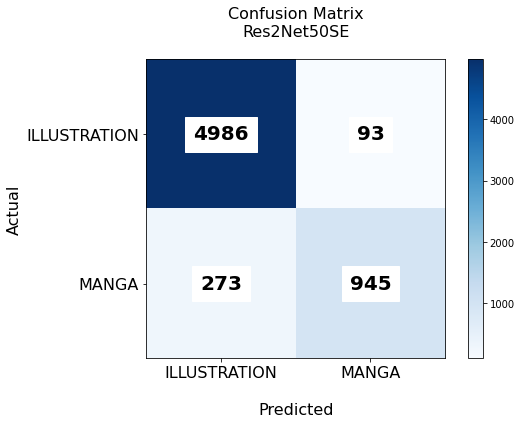

In [15]:
model_report = Reporter(
    h5_file=CFG["model1"]["h5"],
    model_name=CFG["model1"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()

Loading model ...
Model loaded successfully. No custom Keras layers detected.
Processing class prediction ...
394/394 [====================] - 140s 349ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       0.98      0.96      0.97      5079
       MANGA       0.83      0.90      0.87      1218

    accuracy                           0.95      6297
   macro avg       0.90      0.93      0.92      6297
weighted avg       0.95      0.95      0.95      6297



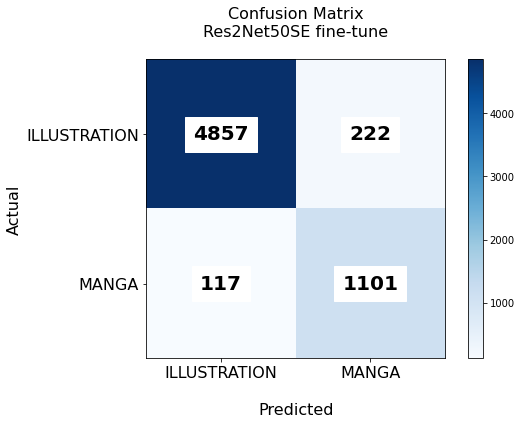

In [16]:
model_report = Reporter(
    h5_file=CFG["model2"]["h5"],
    model_name=CFG["model2"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()

Loading model ...
Error: Custom Keras layers detected.
Loading model with custom objects ...Complete
Processing class prediction ...
394/394 [====================] - 94s 236ms/batch
Generating confusion matrix ... Complete
Generating text based classification report ... Complete
Complete
Classification Report
              precision    recall  f1-score   support

ILLUSTRATION       0.97      0.91      0.94      5079
       MANGA       0.71      0.90      0.79      1218

    accuracy                           0.91      6297
   macro avg       0.84      0.90      0.87      6297
weighted avg       0.92      0.91      0.91      6297



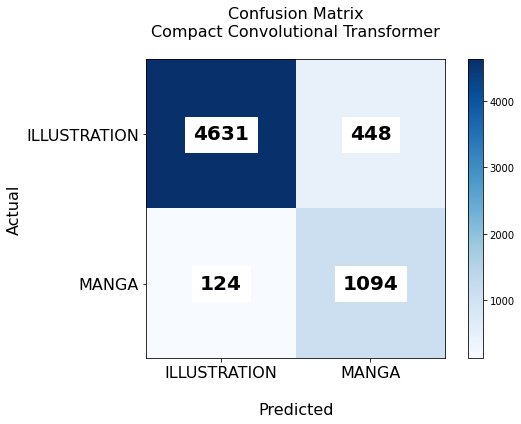

In [17]:
model_report = Reporter(
    h5_file=CFG["model3"]["h5"],
    model_name=CFG["model3"]["name"],
    data_list=BA_path,
    label_list=label_list,
    image_processor=square_image_processing,
    force_batch=16,
)
model_report.print_report()